In [1]:
%matplotlib inline

In [101]:
from empirical_disk_bulge.load_sdss_data import load_umachine_sdss_complete

sdss = load_umachine_sdss_complete()
mask = sdss['deltaBD_mendel13'] < 0.5
cut_sdss = sdss[mask]

In [102]:
from scipy.stats import gaussian_kde

dataset = np.array((sdss['sm'], sdss['ssfr'], sdss['bt']))
cut_dataset = np.array((cut_sdss['sm'], cut_sdss['ssfr'], cut_sdss['bt']))

kdeobj = gaussian_kde(dataset)
kdeobj_cut = gaussian_kde(cut_dataset)

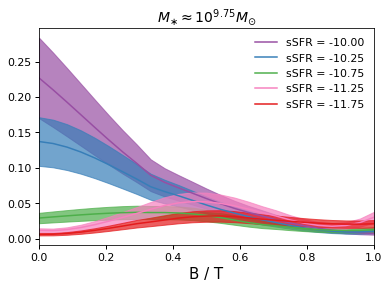

In [103]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)

npts_bt = 25
sm_fixed = 9.75
bt_abscissa = np.linspace(1/float(npts_bt), 1-1/float(npts_bt), npts_bt)
bt_abscissa = np.linspace(0, 1, npts_bt)
ssfr_abscissa = [-10, -10.25, -10.75, -11.25, -11.75]
color_sequence = [purple, blue, green, pink, red]

error_size = 0.25
for ssfr, color in zip(ssfr_abscissa, color_sequence):
    label = 'sSFR = {0:.2f}'.format(ssfr)
    bt_pdf = list(kdeobj_cut.evaluate((sm_fixed, ssfr, bt))[0] for bt in bt_abscissa)
    bt_pdf_smooth = savgol_filter(bt_pdf, 15, 3)
    bt_pdf_low, bt_pdf_high = (1-error_size)*bt_pdf_smooth, (1+error_size)*bt_pdf_smooth

    __=ax.plot(bt_abscissa, bt_pdf_smooth, color=color, label=label)
    __=ax.fill_between(bt_abscissa, bt_pdf_low, bt_pdf_high, alpha=0.7, color=color)

legend = ax.legend(fontsize=11)
title = ax.set_title(r'$M_{\ast} \approx 10^{9.75}M_{\odot}$', size=14)
xlabel = ax.set_xlabel(r'B / T', size=15)
xlim = ax.set_xlim(0, 1)

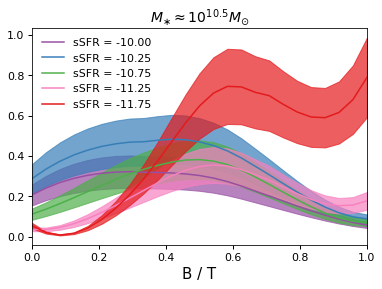

In [104]:
fig, ax = plt.subplots(1, 1)

npts_bt = 25
sm_fixed = 10.5
bt_abscissa = np.linspace(1/float(npts_bt), 1-1/float(npts_bt), npts_bt)
bt_abscissa = np.linspace(0, 1, npts_bt)
ssfr_abscissa = [-10, -10.25, -10.75, -11.25, -11.75]
color_sequence = [purple, blue, green, pink, red]

error_size = 0.25
for ssfr, color in zip(ssfr_abscissa, color_sequence):
    label = 'sSFR = {0:.2f}'.format(ssfr)
    bt_pdf = list(kdeobj_cut.evaluate((sm_fixed, ssfr, bt))[0] for bt in bt_abscissa)
    bt_pdf_smooth = savgol_filter(bt_pdf, 15, 3)
    bt_pdf_low, bt_pdf_high = (1-error_size)*bt_pdf_smooth, (1+error_size)*bt_pdf_smooth

    __=ax.plot(bt_abscissa, bt_pdf_smooth, color=color, label=label)
    __=ax.fill_between(bt_abscissa, bt_pdf_low, bt_pdf_high, alpha=0.7, color=color)

legend = ax.legend(fontsize=11)
title = ax.set_title(r'$M_{\ast} \approx 10^{10.5}M_{\odot}$', size=14)
xlabel = ax.set_xlabel(r'B / T', size=15)
xlim = ax.set_xlim(0, 1)

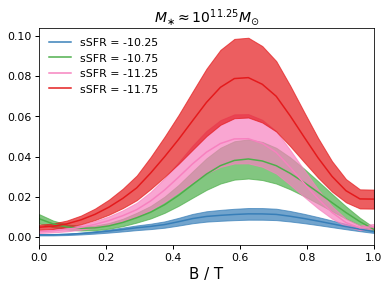

In [105]:
fig, ax = plt.subplots(1, 1)

npts_bt = 25
sm_fixed = 11.25
bt_abscissa = np.linspace(1/float(npts_bt), 1-1/float(npts_bt), npts_bt)
bt_abscissa = np.linspace(0, 1, npts_bt)
ssfr_abscissa = [-10, -10.25, -10.75, -11.25, -11.75]
color_sequence = [purple, blue, green, pink, red]

error_size = 0.25
for ssfr, color in zip(ssfr_abscissa[1:], color_sequence[1:]):
    label = 'sSFR = {0:.2f}'.format(ssfr)
    bt_pdf = list(kdeobj_cut.evaluate((sm_fixed, ssfr, bt))[0] for bt in bt_abscissa)
    bt_pdf_smooth = savgol_filter(bt_pdf, 15, 3)
    bt_pdf_low, bt_pdf_high = (1-error_size)*bt_pdf_smooth, (1+error_size)*bt_pdf_smooth

    __=ax.plot(bt_abscissa, bt_pdf_smooth, color=color, label=label)
    __=ax.fill_between(bt_abscissa, bt_pdf_low, bt_pdf_high, alpha=0.7, color=color)

legend = ax.legend(fontsize=11)
title = ax.set_title(r'$M_{\ast} \approx 10^{11.25}M_{\odot}$', size=14)
xlabel = ax.set_xlabel(r'B / T', size=15)
xlim = ax.set_xlim(0, 1)

In [100]:
sm_fixed = 10.5
mask = sdss['sm'] > sm_fixed-0.15
mask *= sdss['sm'] < sm_fixed+0.15
np.percentile(sdss['ssfr'][mask], (10, 90))

array([-12.2119222, -10.0792926])

In [96]:

np.min(sdss['ssfr'][mask]), np.max(sdss['ssfr'][mask])

(-13.362568000000008, -8.2804410000000104)

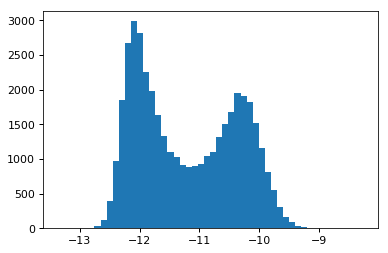

In [97]:
fig, ax = plt.subplots(1, 1)

__=ax.hist(sdss['ssfr'][mask], bins=50)


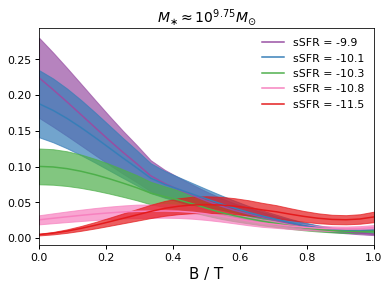

In [112]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)

npts_bt = 25
sm_fixed = 9.75
bt_abscissa = np.linspace(1/float(npts_bt), 1-1/float(npts_bt), npts_bt)
bt_abscissa = np.linspace(0, 1, npts_bt)

ssfr_abscissa = [-10, -10.25, -10.75, -11.25, -11.75]
mask = cut_sdss['sm'] > sm_fixed-0.15
mask *= cut_sdss['sm'] < sm_fixed+0.15
ssfr_abscissa = np.percentile(cut_sdss['ssfr'][mask], (85, 65, 50, 35, 15))

color_sequence = [purple, blue, green, pink, red]

error_size = 0.25
for ssfr, color in zip(ssfr_abscissa, color_sequence):
    label = 'sSFR = {0:.1f}'.format(ssfr)
    bt_pdf = list(kdeobj_cut.evaluate((sm_fixed, ssfr, bt))[0] for bt in bt_abscissa)
    bt_pdf_smooth = savgol_filter(bt_pdf, 15, 3)
    bt_pdf_low, bt_pdf_high = (1-error_size)*bt_pdf_smooth, (1+error_size)*bt_pdf_smooth

    __=ax.plot(bt_abscissa, bt_pdf_smooth, color=color, label=label)
    __=ax.fill_between(bt_abscissa, bt_pdf_low, bt_pdf_high, alpha=0.7, color=color)

legend = ax.legend(fontsize=11)
title = ax.set_title(r'$M_{\ast} \approx 10^{9.75}M_{\odot}$', size=14)
xlabel = ax.set_xlabel(r'B / T', size=15)
xlim = ax.set_xlim(0, 1)

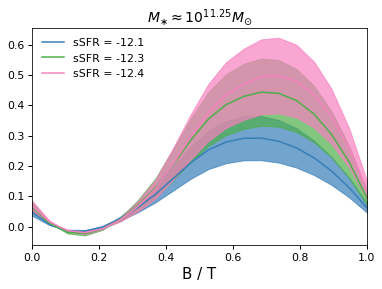

In [120]:
fig, ax = plt.subplots(1, 1)

npts_bt = 20
sm_fixed = 11.25
bt_abscissa = np.linspace(1/float(npts_bt), 1-1/float(npts_bt), npts_bt)
bt_abscissa = np.linspace(0, 1, npts_bt)

ssfr_abscissa = [-10, -10.25, -10.75, -11.25, -11.75]
mask = cut_sdss['sm'] > sm_fixed-0.15
mask *= cut_sdss['sm'] < sm_fixed+0.15
ssfr_abscissa = np.percentile(cut_sdss['ssfr'][mask], (85, 65, 50, 35, 10))

color_sequence = [purple, blue, green, pink, red]

error_size = 0.25
for ssfr, color in zip(ssfr_abscissa[1:-1], color_sequence[1:-1]):
    label = 'sSFR = {0:.1f}'.format(ssfr)
    bt_pdf = list(kdeobj_cut.evaluate((sm_fixed, ssfr, bt))[0] for bt in bt_abscissa)
    bt_pdf_smooth = savgol_filter(bt_pdf, 15, 3)
    bt_pdf_low, bt_pdf_high = (1-error_size)*bt_pdf_smooth, (1+error_size)*bt_pdf_smooth

    __=ax.plot(bt_abscissa, bt_pdf_smooth, color=color, label=label)
    __=ax.fill_between(bt_abscissa, bt_pdf_low, bt_pdf_high, alpha=0.7, color=color)

legend = ax.legend(fontsize=11)
title = ax.set_title(r'$M_{\ast} \approx 10^{11.25}M_{\odot}$', size=14)
xlabel = ax.set_xlabel(r'B / T', size=15)
xlim = ax.set_xlim(0, 1)